# Import the required packages

In [1]:
import numpy as np
import pandas as pd

# Generate random house price and size and places them in dataset

In [2]:
def generate_house_data(n_samples=100):
    np.random.seed(50)
    size = np.random.normal(1400, 50, n_samples)
    price = size * 50 + np.random.normal(0, 50, n_samples)
    return pd.DataFrame({'size': size, 'price':price})

In [3]:
df = generate_house_data(n_samples=100)
df

,size,price
0,1321.982395,66086.212282
1,1398.451120,69924.913799
2,1368.953579,68426.325683
3,1326.770976,66332.487139
4,1470.597306,73521.436577
...,...,...
95,1334.661329,66821.650808
96,1355.511585,67727.300704
97,1400.263387,70081.687066
98,1443.321244,72137.698251


# Import linear regresion model to train the dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [5]:
def train_model():
    df = generate_house_data(n_samples=100)
    X = df[['size']]  # Need 2D array for sklearn
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Model Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Model Coefficient (price per sq ft): ${model.coef_[0]:.2f}")
    print(f"Model Intercept: ${model.intercept_:.2f}")

    return model, X_test, y_test, y_pred

In [6]:
model, X_test, y_test, y_pred = train_model()

Model Performance:
Mean Squared Error: 2851.43
Root Mean Squared Error: 53.40
Model Coefficient (price per sq ft): $49.81
Model Intercept: $256.85


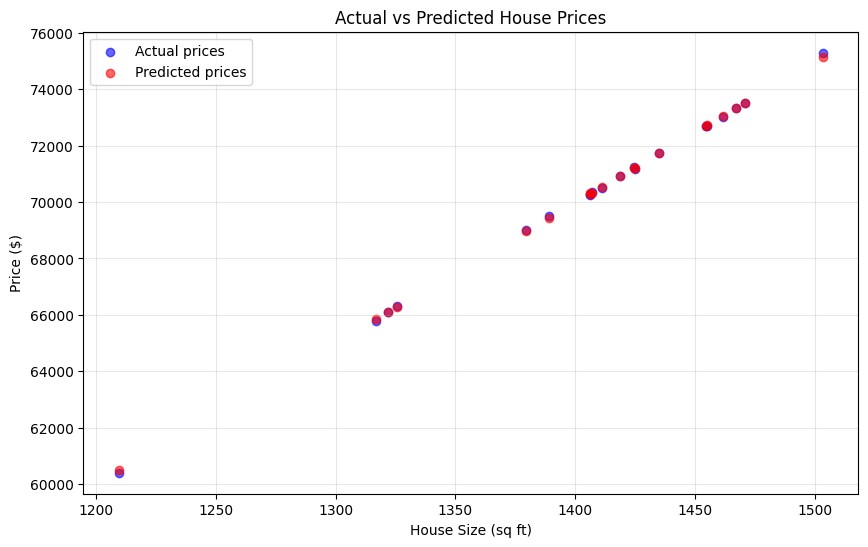


For a house of 1500 sq ft:
Predicted price: $74,971.46


/home/vin/House-price-predicator/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual prices')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted prices')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Test the model with a specific house size
test_size = 1500
predicted_price = model.predict([[test_size]])
print(f"\nFor a house of {test_size} sq ft:")
print(f"Predicted price: ${predicted_price[0]:,.2f}")